# Integrated Notes on Pseudo-Random Number Generators

## 1. Introduction 
Pseudo-random number generators (PRNGs) produce deterministic sequences that *appear* random. They are central to simulations (e.g., Monte Carlo methods), statistical sampling, and many other applications. Despite their name, PRNGs are not truly random; their outputs depend on an initial seed and known recurrence or transformation. 

**Key Concepts in PRNGs**:
- **Period**: A PRNG eventually repeats its sequence. A longer period reduces the chance of repetition during practical use.
- **Statistical Quality**: Good PRNGs mimic uniform or other distributions in a way that passes statistical randomness tests (e.g., Kolmogorov-Smirnov).
- **Cryptographic Security**: Some PRNGs aim for unpredictability (e.g., cryptographically secure generators). General-purpose PRNGs like LCG or Mersenne Twister are not suitable for security.

Additionally, **quasi-random** (or low-discrepancy) sequences such as **Sobol** are deterministic but designed to fill multidimensional space more uniformly than purely random sequences—often leading to more efficient numerical integration in high dimensions.

To evaluate whether a sample *looks* random, statisticians often use the **Kolmogorov-Smirnov (KS) test**, which compares an empirical distribution to a theoretical one (or compares two sample distributions).

---

## 2. Linear Congruential Generator (LCG)

### 2.1. Theory
A **Linear Congruential Generator** uses the recurrence:

\[
X_{n+1} = (a X_n + c)\;\bmod\; m
\]

Parameters:
- \(a\): multiplier  
- \(c\): increment  
- \(m\): modulus  
- \(X_0\): seed (initial state)

Each output \(\frac{X_n}{m}\) is a pseudo-random number in \([0,1)\).  

**Strengths**:  
- **Simplicity**: Very easy to implement.  
- **Speed**: One multiplication, one addition, and a mod operation per step.  

**Limitations**:  
- **Short/limited period** (max \(m\)).  
- **Non-cryptographic**: Predictable if parameters/seed are known.  
- **Poor high-dimensional randomness**: Tends to fall into hyperplanes in multiple dimensions.

### 2.2. Python Example
Below is a Python class that implements a simple LCG and generates a histogram to visualize the distribution.

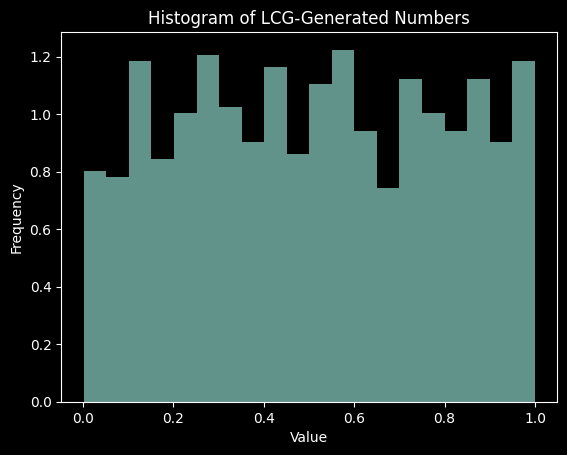

In [1]:
import numpy as np
import matplotlib.pyplot as plt

class LinearCongruentialGenerator:
    def __init__(self, seed=1, a=1664525, c=1013904223, m=2**32):
        self.a = a
        self.c = c
        self.m = m
        self.state = seed

    def next(self):
        """Generate the next random number."""
        self.state = (self.a * self.state + self.c) % self.m
        return self.state / self.m  # Normalize to [0,1)

    def generate(self, n):
        """Generate n random numbers."""
        return [self.next() for _ in range(n)]

# Example usage
lcg = LinearCongruentialGenerator(seed=42)
random_numbers = lcg.generate(1000)

# Visualize distribution
plt.hist(random_numbers, bins=20, density=True, alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of LCG-Generated Numbers")
plt.show()

---

## 3. Mersenne Twister (MT19937)

### 3.1. Overview
**Mersenne Twister (MT19937)** is a widely used PRNG with:
- A **huge period** of \(2^{19937} - 1\).
- Excellent statistical properties (passes many test batteries).
- Very fast generation, using bitwise operations on a 624-element internal state array.

**Limitations**:
- **Not cryptographically secure**. If an attacker knows enough consecutive outputs, they can reverse-engineer the internal state.

### 3.2. Python Examples

1. **Using NumPy** (recommended for simulations):

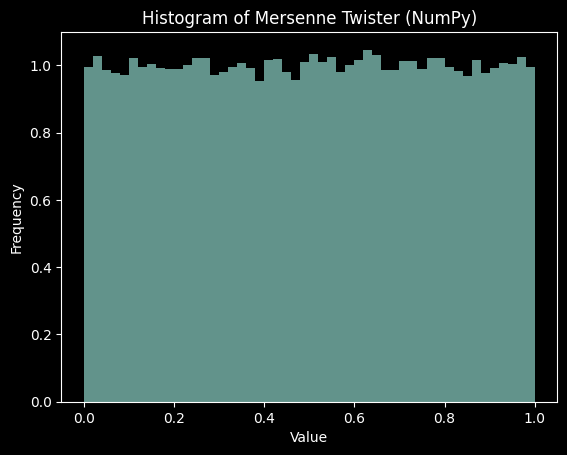

In [2]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(seed=42)
random_numbers_mt = rng.random(100000)

plt.hist(random_numbers_mt, bins=50, density=True, alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Mersenne Twister (NumPy)")
plt.show()

2. **Using Python’s built-in `random` module** (also MT19937 under the hood):

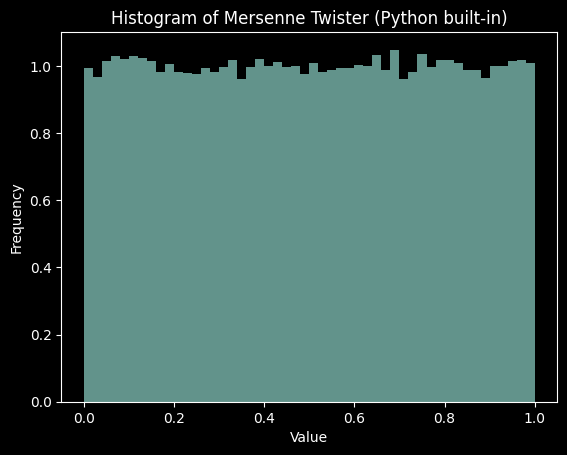

In [3]:
import random
import matplotlib.pyplot as plt

random.seed(42)
random_numbers_builtin = [random.random() for _ in range(100000)]

plt.hist(random_numbers_builtin, bins=50, density=True, alpha=0.7)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Mersenne Twister (Python built-in)")
plt.show()

---

## 4. Sobol Sequences (Quasi-Random)

### 4.1. What Are Sobol Sequences?
**Sobol sequences** are *low-discrepancy* (quasi-random) sequences that fill the unit hypercube \([0,1)^d\) in a more uniform way than pseudo-random numbers. This reduces clustering and can significantly improve integration or optimization convergence in high dimensions.

### 4.2. Python Example (SciPy)

/home/julihocc/ma2008b/notes.worktrees/FJ2025/.venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


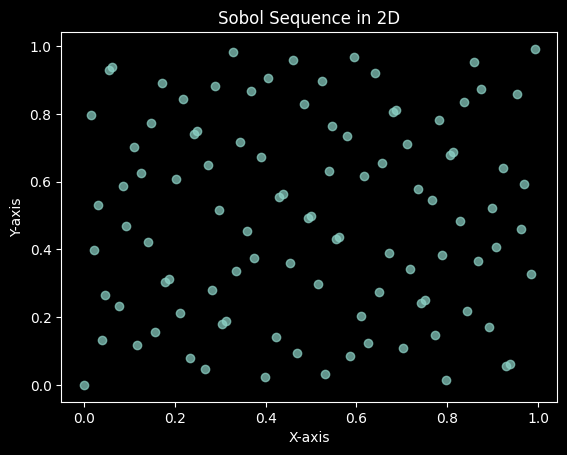

In [4]:
from scipy.stats.qmc import Sobol
import numpy as np
import matplotlib.pyplot as plt

# Generate a 2D Sobol sequence of 100 points
sobol = Sobol(d=2, scramble=False)  # scramble=True adds slight randomness
quasi_random_points = sobol.random(n=100)

plt.scatter(quasi_random_points[:, 0], quasi_random_points[:, 1], alpha=0.7)
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Sobol Sequence in 2D")
plt.show()

When you plot *random* points vs. *Sobol* points (both 2D), you’ll see how Sobol covers the square more evenly, with fewer large empty spaces or tight clusters.

---

## 5. Kolmogorov-Smirnov (KS) Test

### 5.1. Purpose
The **Kolmogorov-Smirnov test** checks how well a sample matches a reference distribution (one-sample KS) or compares two samples (two-sample KS). For PRNG validation, a common usage is the one-sample KS test against a uniform distribution:  
\[
H_0: \text{The data come from a uniform distribution on } [0,1).
\]

### 5.2. Python Example

In [5]:
import numpy as np
from scipy.stats import kstest, ks_2samp, norm

# 1) One-sample KS test comparing a sample to a normal distribution
sample = np.random.normal(loc=0, scale=1, size=100)
ks_stat, p_value = kstest(sample, 'norm')
print(f"One-Sample KS test: Statistic={ks_stat}, P-value={p_value}")

# 2) Two-sample KS test comparing two different distributions
sample1 = np.random.normal(0, 1, 100)
sample2 = np.random.uniform(-1, 1, 100)
ks_stat_2samp, p_value_2samp = ks_2samp(sample1, sample2)
print(f"Two-Sample KS test: Statistic={ks_stat_2samp}, P-value={p_value_2samp}")

One-Sample KS test: Statistic=0.06151002348526147, P-value=0.8210706233483684
Two-Sample KS test: Statistic=0.19, P-value=0.05390207893129876


- **Interpretation**:  
  - A large statistic and small p-value \((<0.05)\) imply we reject the hypothesis that the distributions match.

---

## 6. Summary and Comparisons

Below is a concise overview of each generator type and its typical usage.

| **Generator / Sequence** | **Period**                | **Speed**         | **Statistical Quality**       | **Security**               | **Use Cases**                                 |
|--------------------------|----------------------------|-------------------|-------------------------------|----------------------------|-----------------------------------------------|
| **LCG**                  | \(\leq m\)                | ✅ Fast           | Fair (depends on parameters)  | ❌ Not secure              | Basic simulations, simple teaching examples    |
| **Mersenne Twister**     | \(2^{19937} - 1\)         | ✅✅ Very Fast    | Excellent for typical tests   | ❌ Not secure              | General-purpose random draws (e.g., in NumPy) |
| **Sobol** (Quasi-Random) | Deterministic; not “periodic” in the same sense, but systematically covers the space | ✅✅ Efficient | Low-discrepancy (more uniform coverage) | N/A (not used for security) | Monte Carlo integration, optimization         |
| **Cryptographic PRNG**   | Very large or “infeasible” period | ❌ Slower       | Unpredictable by design       | ✅ Secure                 | Cryptography, sensitive data generation       |

**Key Takeaways**:
- **Choose Mersenne Twister** (or similarly advanced PRNG) for general simulations where speed and good randomness are needed.
- **Use Sobol sequences** (or other quasi-random) for numerical integration or high-dimensional sampling to improve coverage and convergence rates.
- **Validate** your generator’s uniformity with the **Kolmogorov-Smirnov test** if needed.
- **Never use** LCG or Mersenne Twister for **security**—cryptographically secure RNGs like `secrets` or ChaCha20 are required.

---

## 7. Final Remarks
Pseudo-random number generation is a vast topic bridging mathematics, computer science, and statistics. While LCGs illustrate the basics and Mersenne Twister remains the workhorse for many libraries, emerging **quasi-random** methods (e.g., Sobol) and advanced PRNGs (e.g., Xoshiro, PCG) often offer even better performance or distribution properties for certain use cases. Always ensure your chosen generator aligns with the needs of your application—**speed, statistical reliability, dimensional coverage, and security** are the main decision criteria.